In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web

In [227]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [228]:
import yfinance as yf
import datetime
from datetime import date

# Define the ticker symbol and date range
ticker = '^NSEBANK'
start_date = datetime.datetime(2010, 1, 1)
end_date = date.today()

# Fetch the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Select the adjusted close prices
print(data.columns)
data = data[['Adj Close']]
data.columns = ['Close']

# Display the first few rows of the data
print(data.head())
print(data.shape)


[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Close
Date                   
2010-01-04  9112.244141
2010-01-05  9192.043945
2010-01-06  9222.892578
2010-01-07  9192.843750
2010-01-08  9160.593750
(3272, 1)


In [229]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3272 number of days in the dataset.


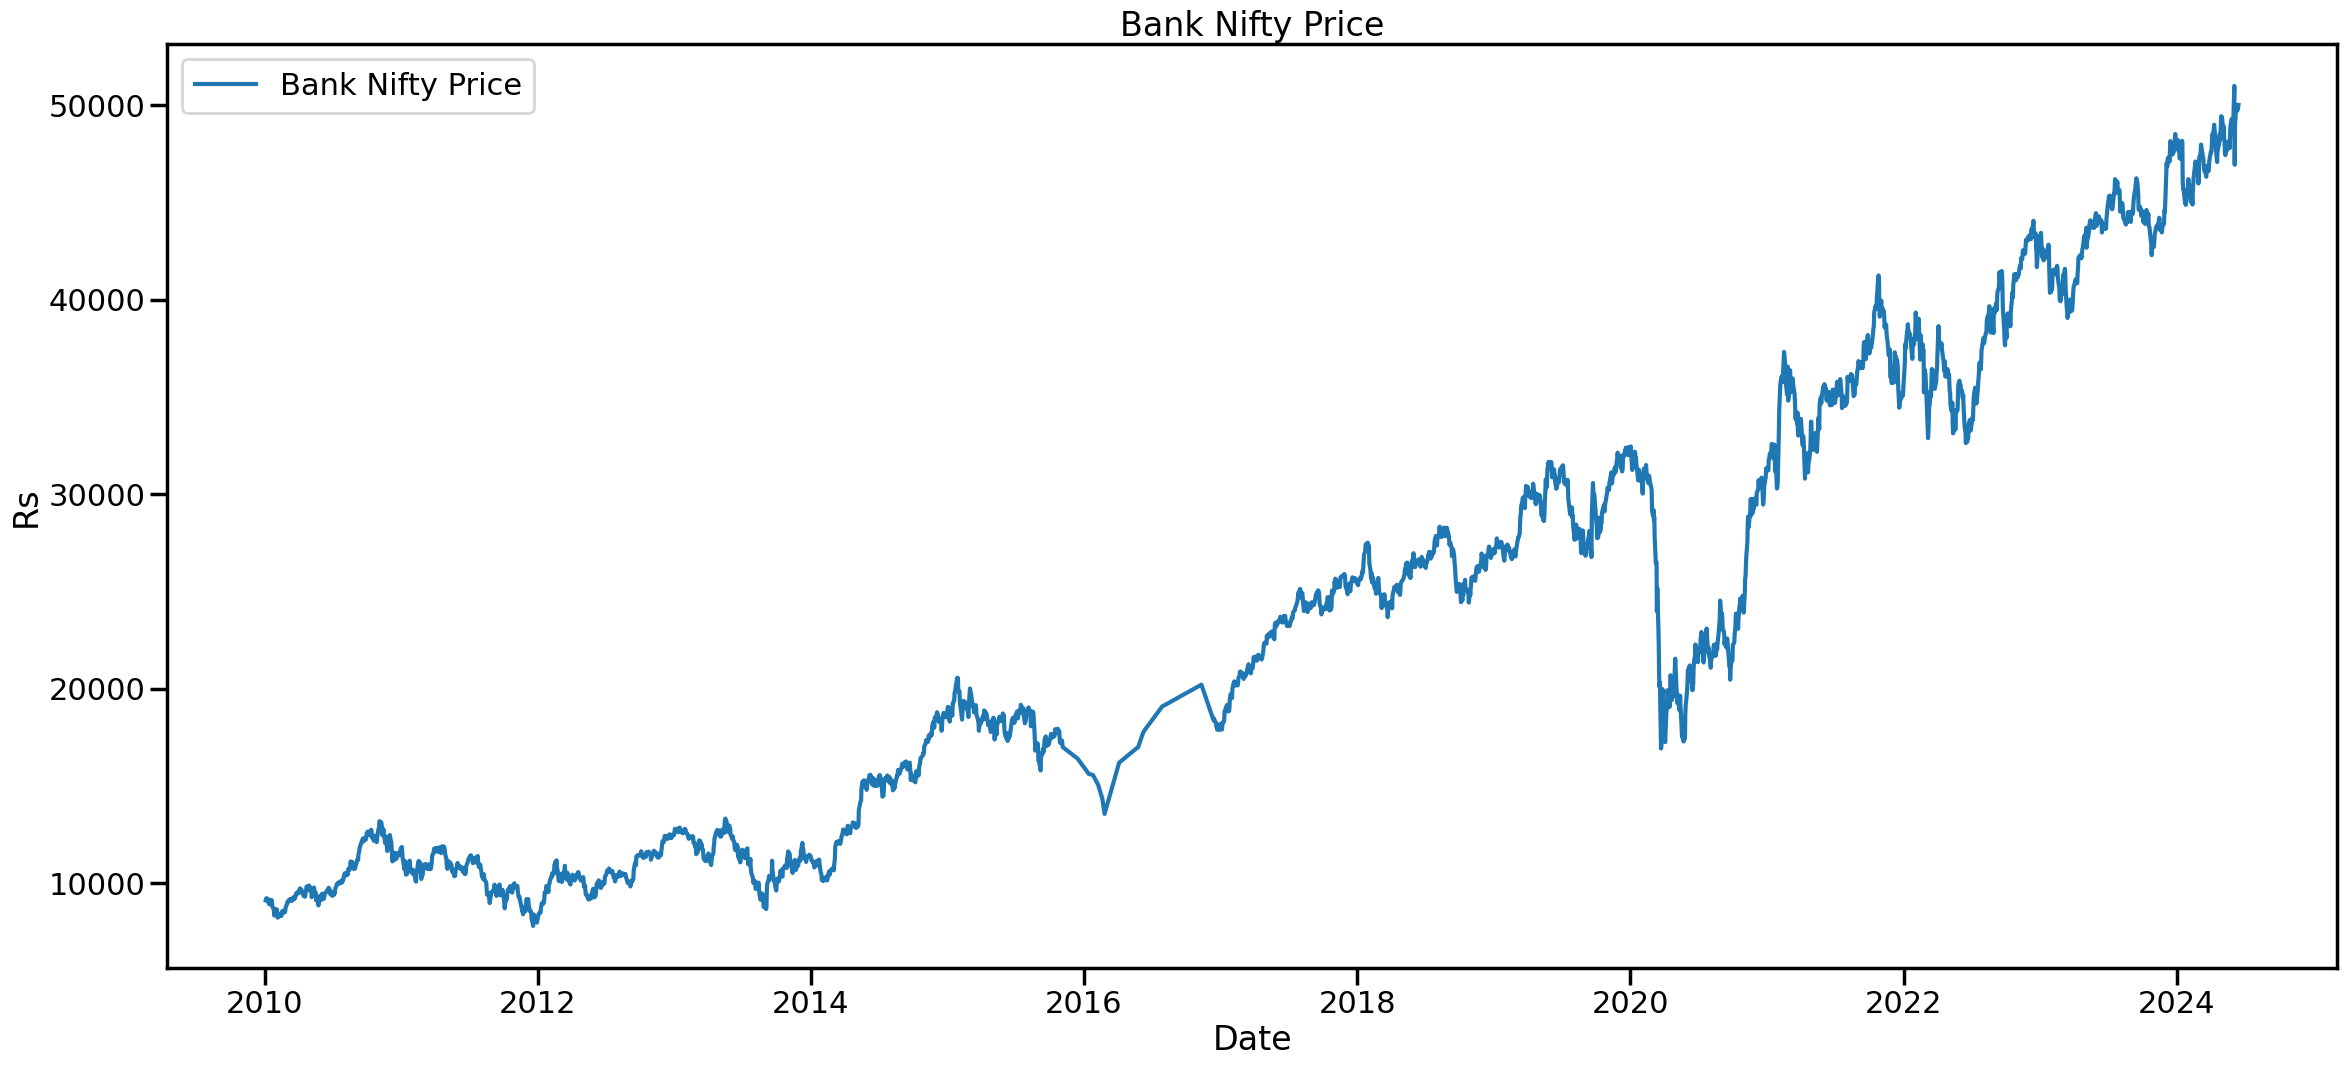

In [230]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Close'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [231]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [232]:
df = get_technical_indicators(data)

C:\Users\g6kan\AppData\Local\Temp\ipykernel_24128\4252838282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
C:\Users\g6kan\AppData\Local\Temp\ipykernel_24128\4252838282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
C:\Users\g6kan\AppData\Local\Temp\ipykernel_24128\4252838282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [233]:
df = df.dropna()
df.head()

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951


In [234]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

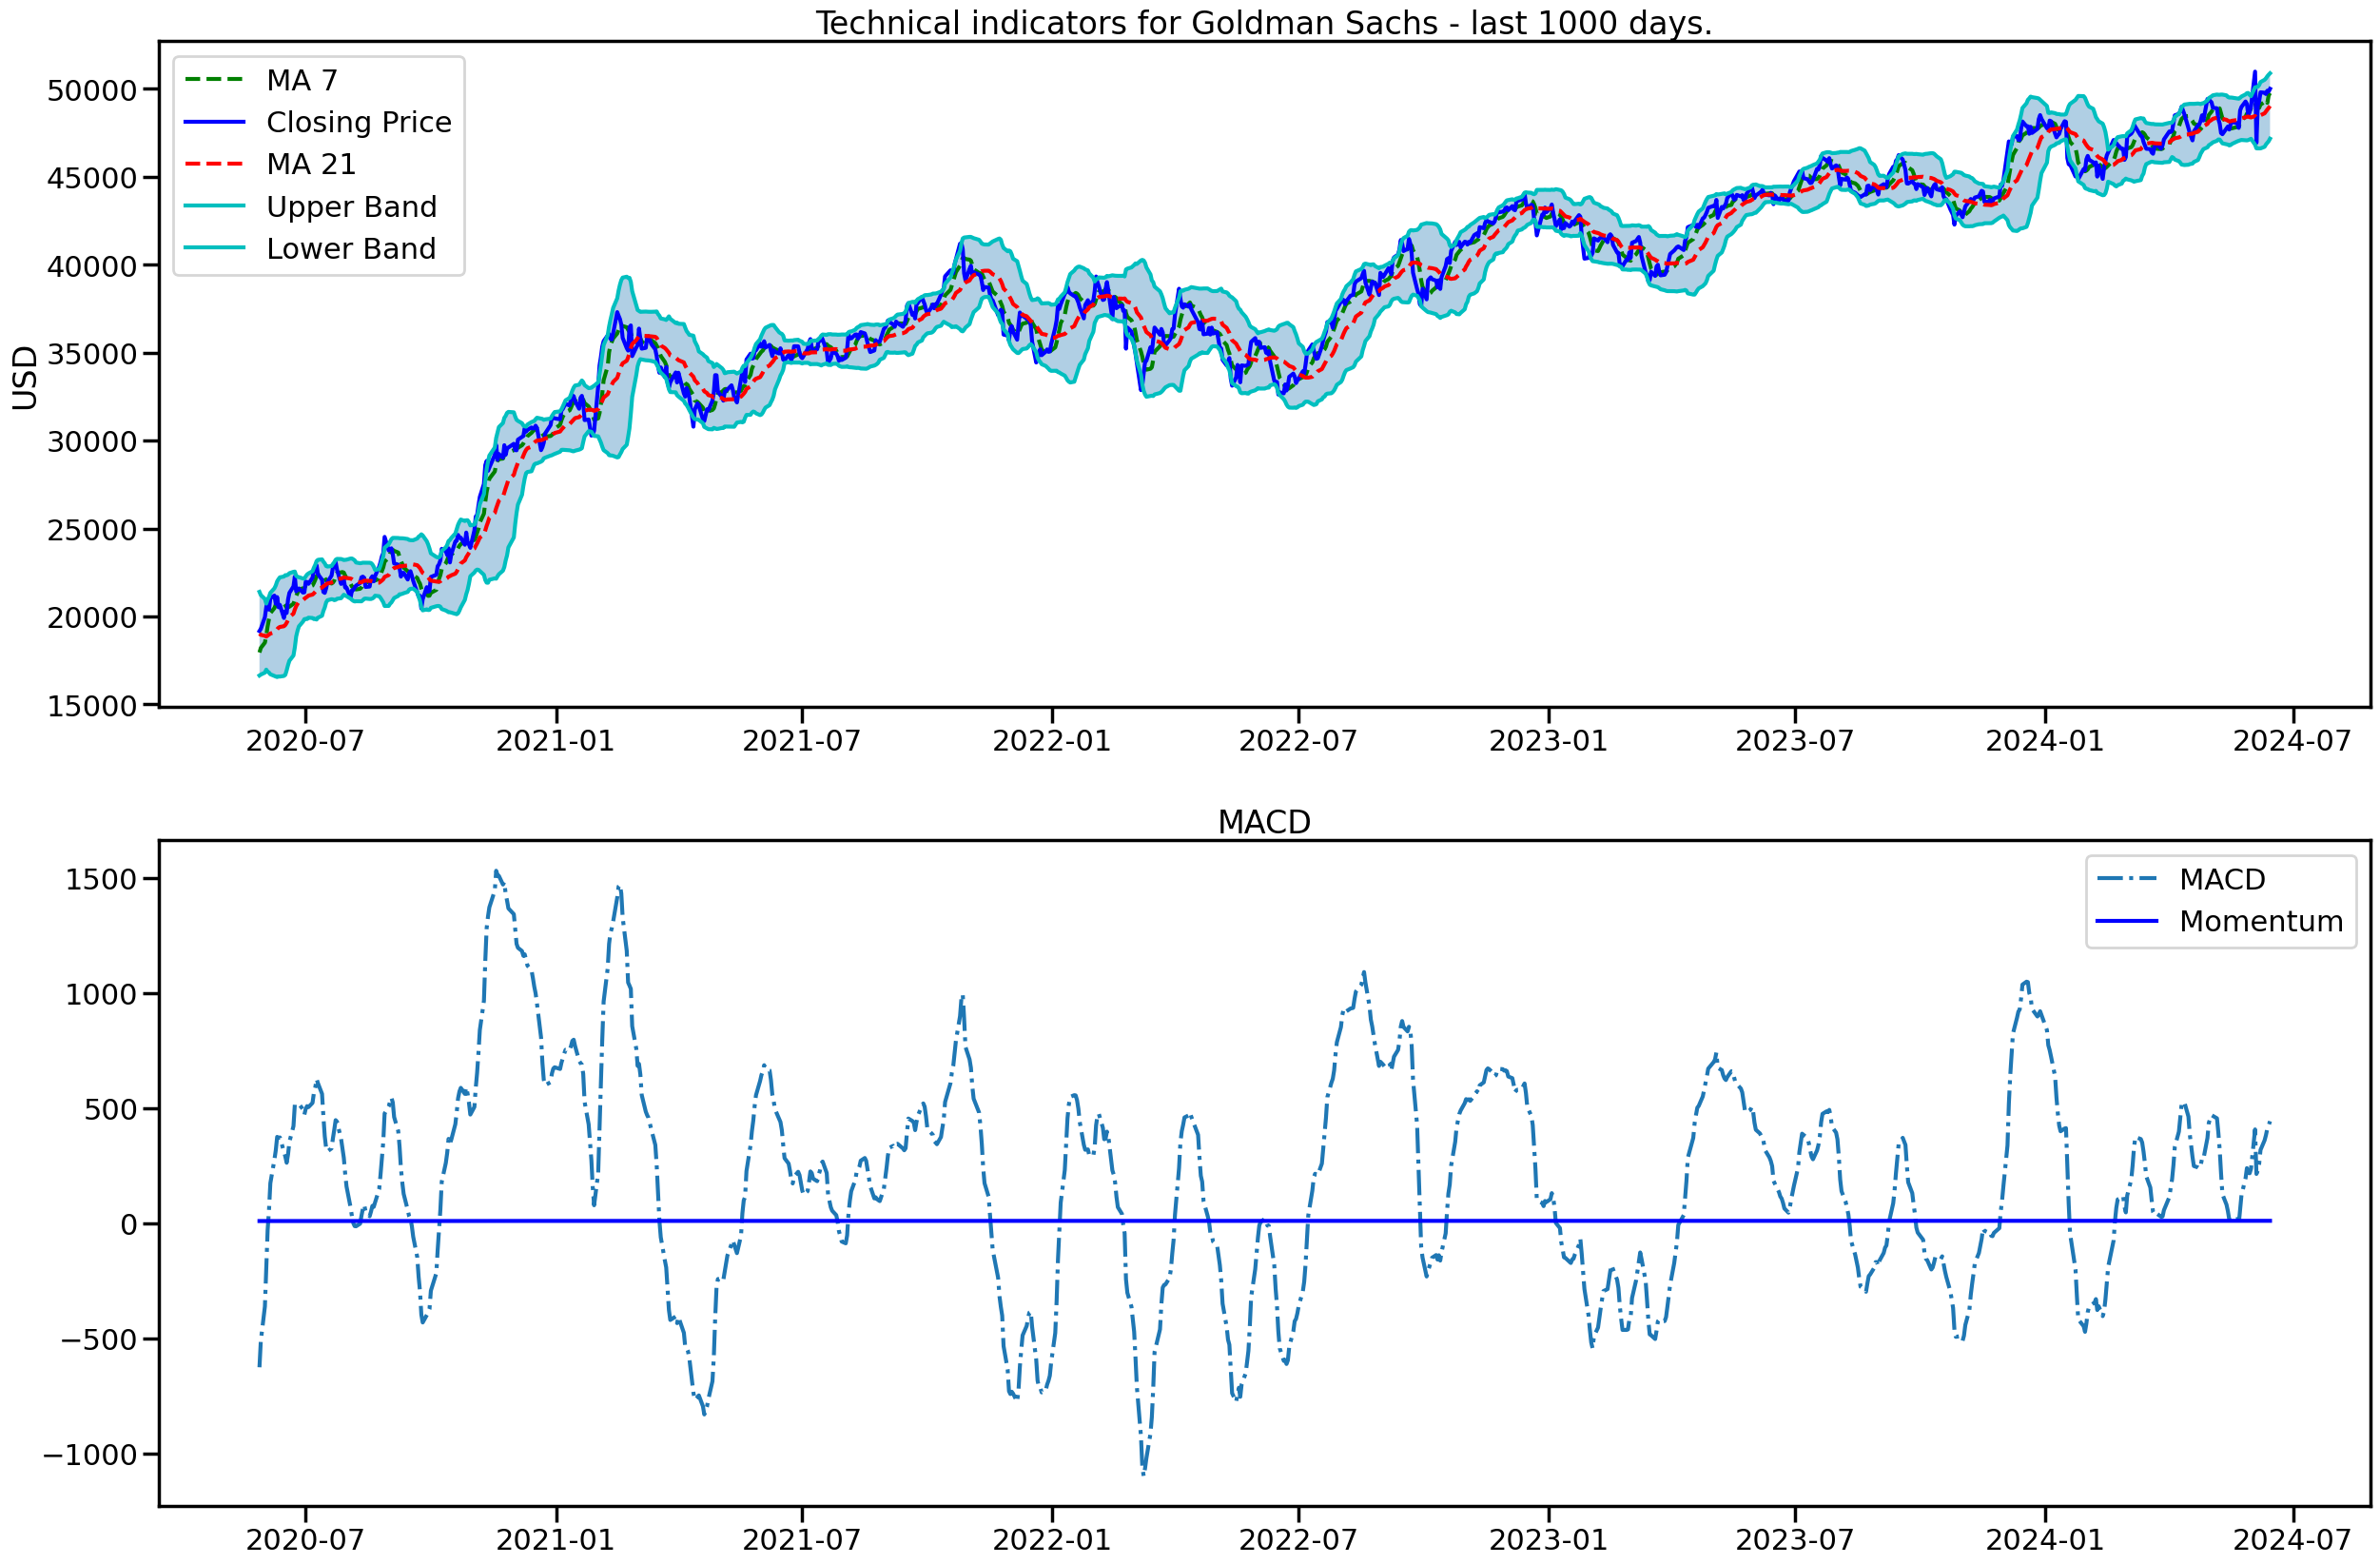

In [235]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

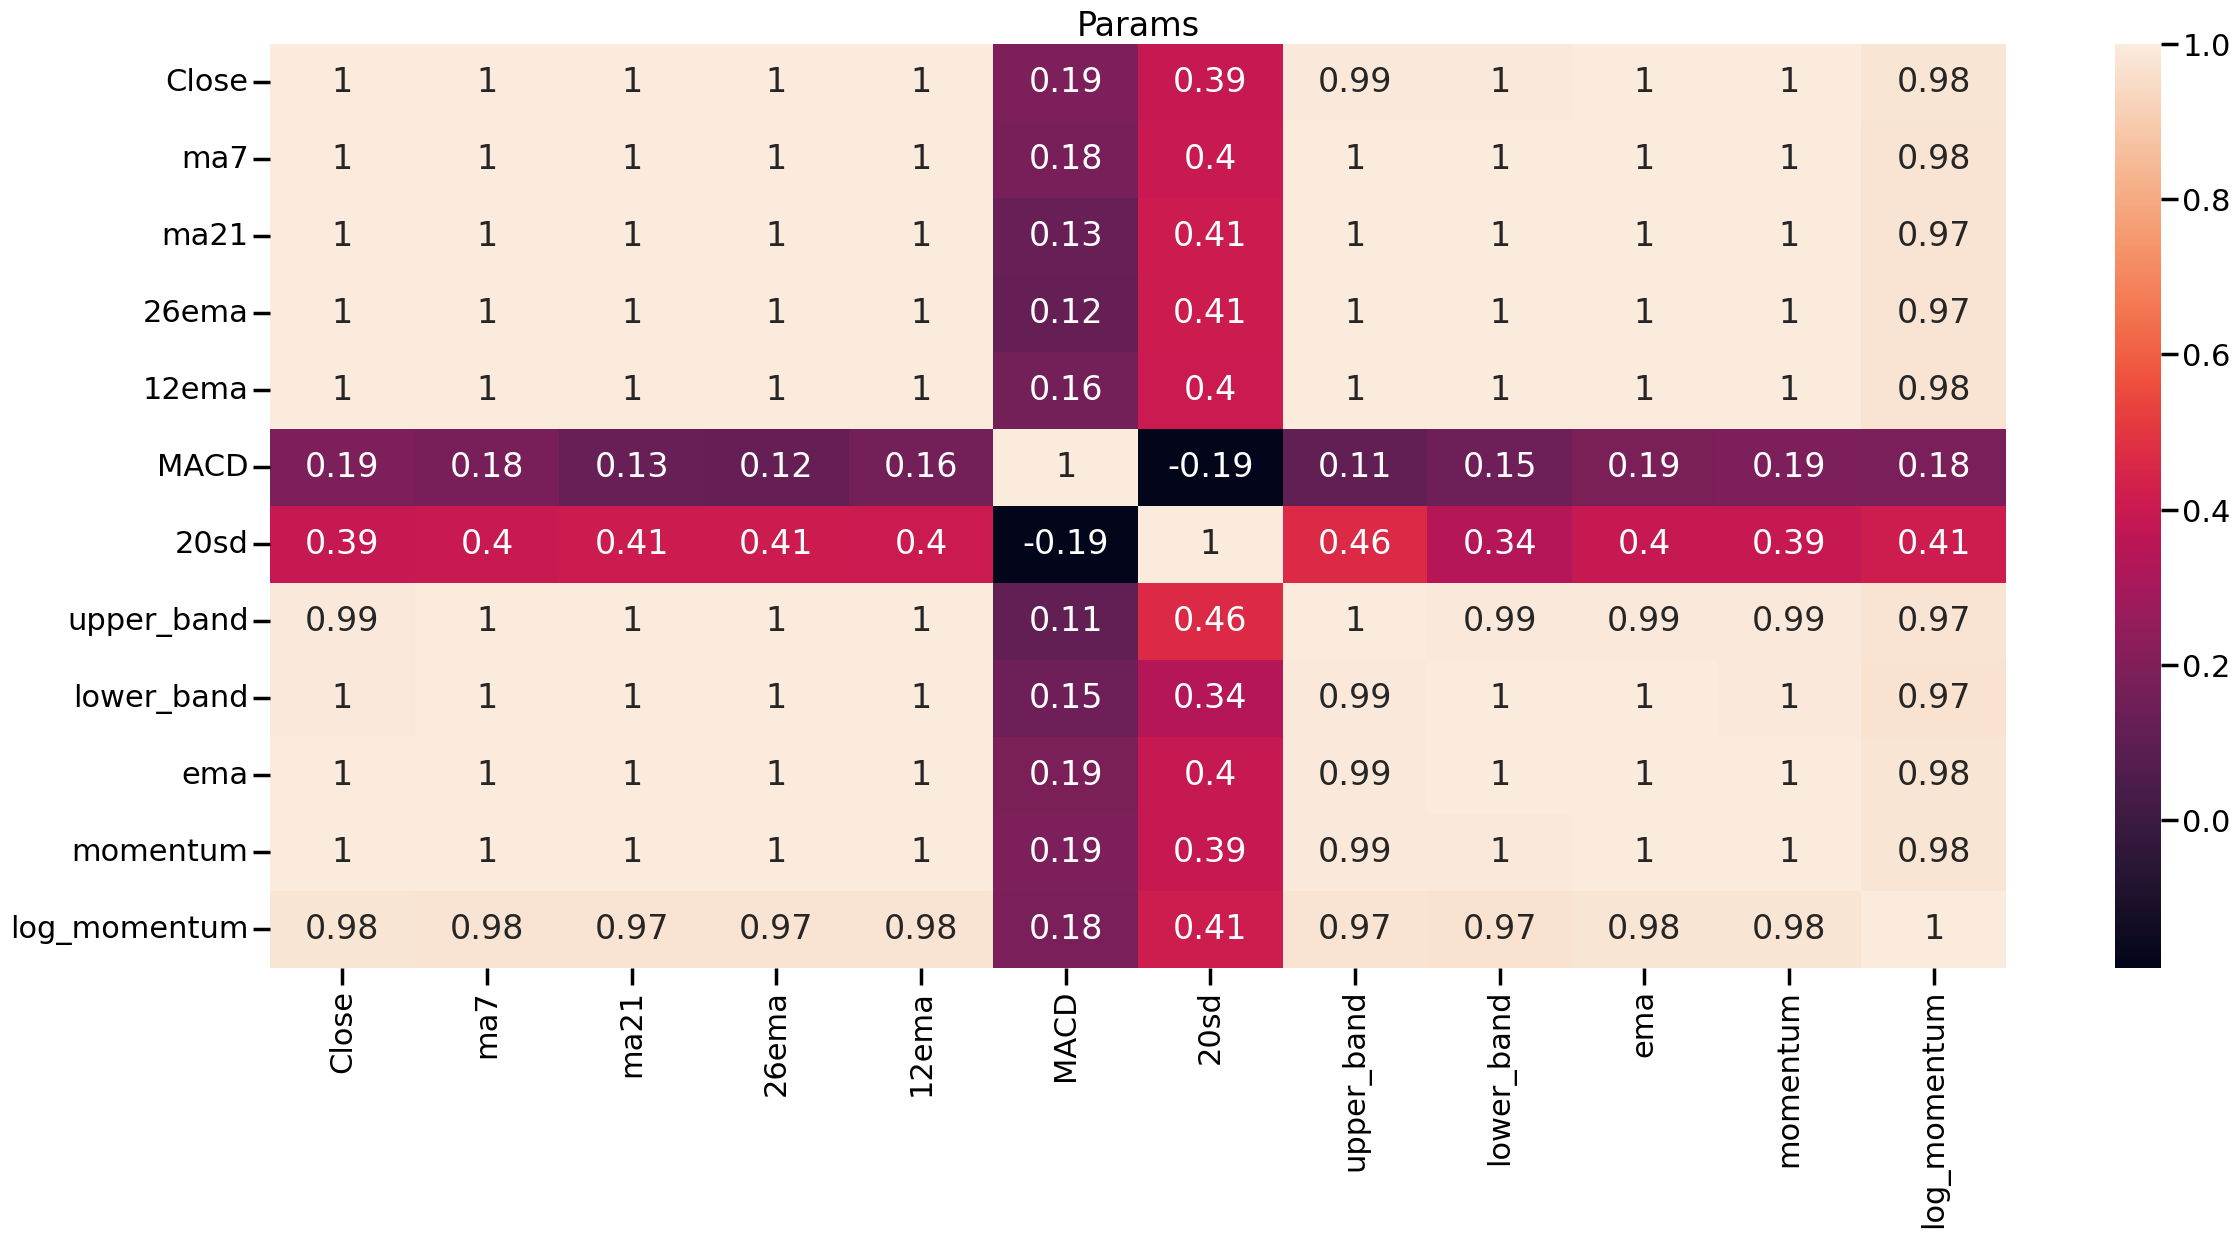

In [236]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [237]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3252 samples, and 12 features.


In [238]:
df.columns

Index(['Close', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [239]:
df

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,49780.898438,49260.442522,48610.283296,48727.271581,49087.760908,360.489328,952.765078,50515.813452,46704.753141,49710.286094,49779.898438,10.815367
2024-06-11,49705.750000,49363.556920,48719.076079,48799.751464,49182.836153,383.084690,940.546828,50600.169735,46837.982423,49707.262031,49704.750000,10.813856
2024-06-12,49895.101562,49208.578683,48821.028460,48880.888508,49292.415447,411.526939,946.735094,50714.498649,46927.558271,49832.488385,49894.101562,10.817658


In [240]:
data_training = df[df.index < '2020-01-31'].copy()
data_training

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,31241.386719,31202.494420,31720.293341,31565.852787,31388.655335,-177.197452,533.871579,32788.036499,30652.550182,31141.777205,31240.386719,10.349467
2020-01-27,30837.041016,31057.281808,31665.041574,31511.866730,31303.791594,-208.075136,563.012244,32791.066062,30539.017085,30938.619745,30836.041016,10.336439
2020-01-28,30761.042969,30938.818917,31586.425874,31456.250155,31220.291805,-235.958349,568.734305,32723.894484,30448.957265,30820.235228,30760.042969,10.333972


In [241]:
data_testing = df[df.index >= '2020-01-31'].copy()
data_testing

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2020-01-31,30833.242188,30885.726842,31367.266555,31317.791353,31048.268608,-269.522745,536.613796,32440.494146,30294.038964,30794.597977,30832.242188,10.336316
2020-02-03,30022.900391,30745.614118,31269.839100,31221.873504,30890.519651,-331.353853,586.294135,32442.427370,30097.250830,30280.132919,30021.900391,10.309682
2020-02-04,30686.341797,30666.321987,31243.627418,31182.204489,30859.107674,-323.096815,599.990201,32443.607820,30043.647016,30550.938838,30685.341797,10.331540
2020-02-05,31001.589844,30689.828962,31224.701451,31168.825626,30881.028008,-287.797619,601.110365,32426.922180,30022.480721,30851.372842,31000.589844,10.341762
2020-02-06,31303.687500,30767.349609,31221.387277,31178.815395,30946.052545,-232.762850,600.441689,32422.270654,30020.503899,31152.915947,31302.687500,10.351459
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,49780.898438,49260.442522,48610.283296,48727.271581,49087.760908,360.489328,952.765078,50515.813452,46704.753141,49710.286094,49779.898438,10.815367
2024-06-11,49705.750000,49363.556920,48719.076079,48799.751464,49182.836153,383.084690,940.546828,50600.169735,46837.982423,49707.262031,49704.750000,10.813856
2024-06-12,49895.101562,49208.578683,48821.028460,48880.888508,49292.415447,411.526939,946.735094,50714.498649,46927.558271,49832.488385,49894.101562,10.817658


In [242]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2176, 12)


array([[0.0271695 , 0.0178389 , 0.02426481, ..., 0.02622306, 0.0271695 ,
        0.05778646],
       [0.03381171, 0.01700593, 0.02330101, ..., 0.02924352, 0.03381171,
        0.07121799],
       [0.02728917, 0.01567189, 0.02185472, ..., 0.02587455, 0.02728917,
        0.05803074],
       ...,
       [0.93173347, 0.9441696 , 0.97956901, ..., 0.93675545, 0.93173347,
        0.96264782],
       [0.93642397, 0.94296482, 0.97660463, ..., 0.93829088, 0.93642397,
        0.96527886],
       [0.92710786, 0.94118915, 0.97356733, ..., 0.93255278, 0.92710786,
        0.96004348]])

In [243]:
X_train = []
y_train = []

In [244]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [245]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2116, 60, 12), (2116,))

In [249]:
regressor = Sequential()
# 1st layer with Dropout regularisation
# * units = add 100 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
# * input_shape => Shape of the training dataset
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 12)))
# 20% of the layers will be dropped
regressor.add(Dropout(0.2))
# 2nd LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
regressor.add(LSTM(units=50, return_sequences=True))
# 20% of the layers will be dropped
regressor.add(Dropout(0.2))
# 3rd LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
regressor.add(LSTM(units=50, return_sequences=True))
# 50% of the layers will be dropped
regressor.add(Dropout(0.5))
# 4th LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
regressor.add(LSTM(units=50))
# 50% of the layers will be dropped
regressor.add(Dropout(0.5))
# Dense layer that specifies an output of one unit
regressor.add(Dense(units=1))
regressor.summary()

c:\Users\g6kan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,851 (452.54 KB)

 Trainable params: 115,851 (452.54 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
regressor.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,851 (452.54 KB)

 Trainable params: 115,851 (452.54 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [252]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0663
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0101
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0111
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0099
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0066
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0070
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0069
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0067
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0064
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0055
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0080
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0055
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0052
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0053
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0090
Epoc

In [253]:
past_60 = data_training.tail(60)
dt = pd.concat([past_60, data_testing], ignore_index=True)
# print(dt.columns)
dt.shape

(1136, 12)

In [254]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1136, 12)


array([[0.39051879, 0.38410668, 0.33836658, ..., 0.39012074, 0.39051879,
        0.52593041],
       [0.40196088, 0.38951836, 0.34183155, ..., 0.39751199, 0.40196088,
        0.53754751],
       [0.40265228, 0.39290765, 0.34641042, ..., 0.40045363, 0.40265228,
        0.53824474],
       ...,
       [0.96815126, 0.98276352, 0.99321076, ..., 0.98631103, 0.96815126,
        0.98050087],
       [0.96673027, 0.99577549, 0.9963471 , ..., 0.98659939, 0.96673027,
        0.97962103],
       [0.97128956, 1.        , 1.        , ..., 0.9898468 , 0.97128956,
        0.98244101]])

In [255]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1076, 60, 12), (1076,))

In [256]:
y_pred = regressor.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [257]:
y_pred

array([[0.44895667],
       [0.44654876],
       [0.4441427 ],
       ...,
       [0.94938064],
       [0.95108044],
       [0.9528798 ]], dtype=float32)

In [258]:
scale = 1/scalar.scale_[0]

In [259]:
y_pred = y_pred*scale
y_test = y_test*scale

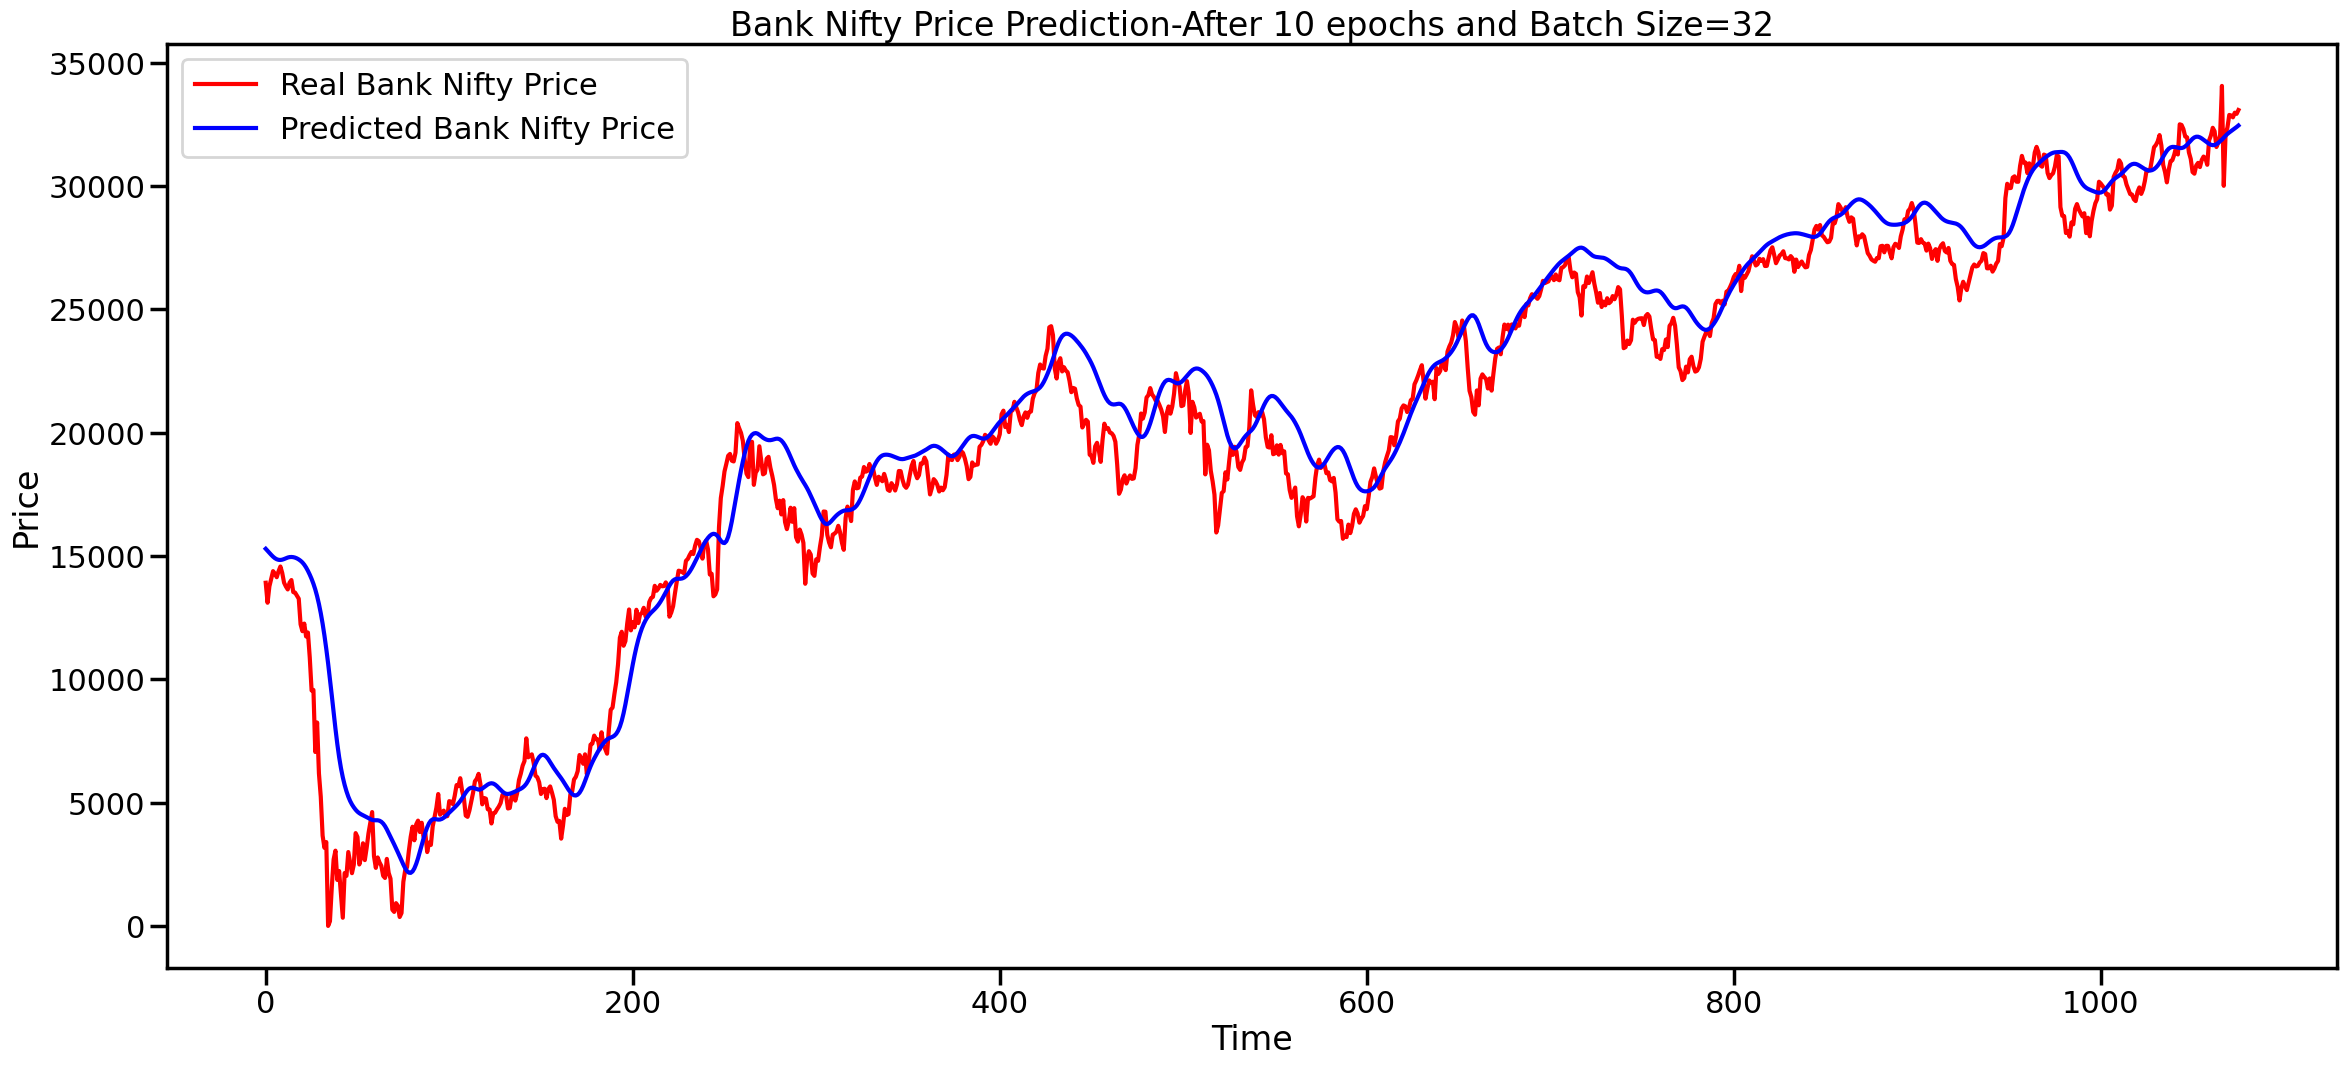

In [260]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

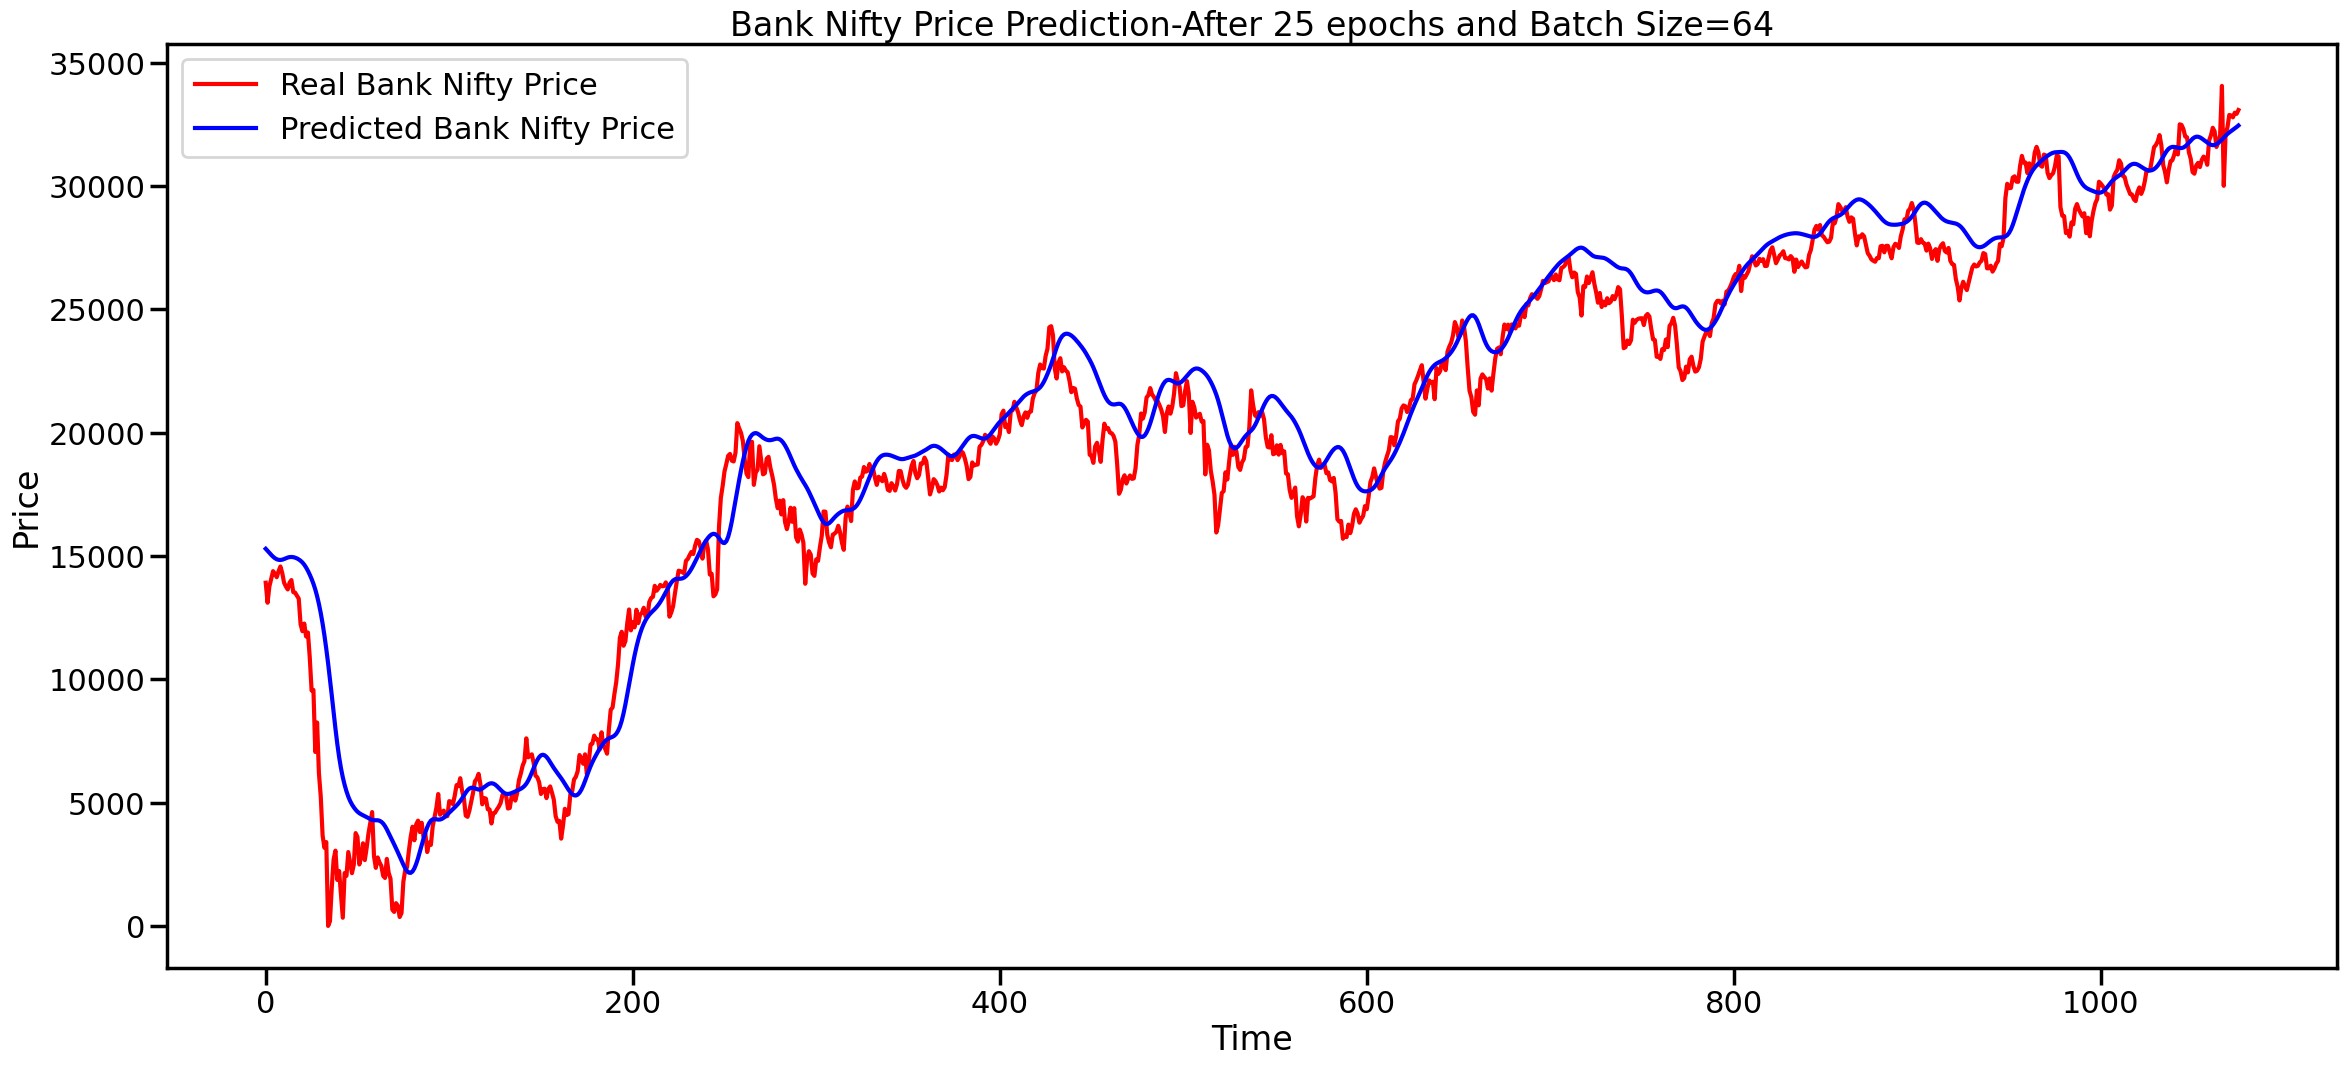

In [261]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

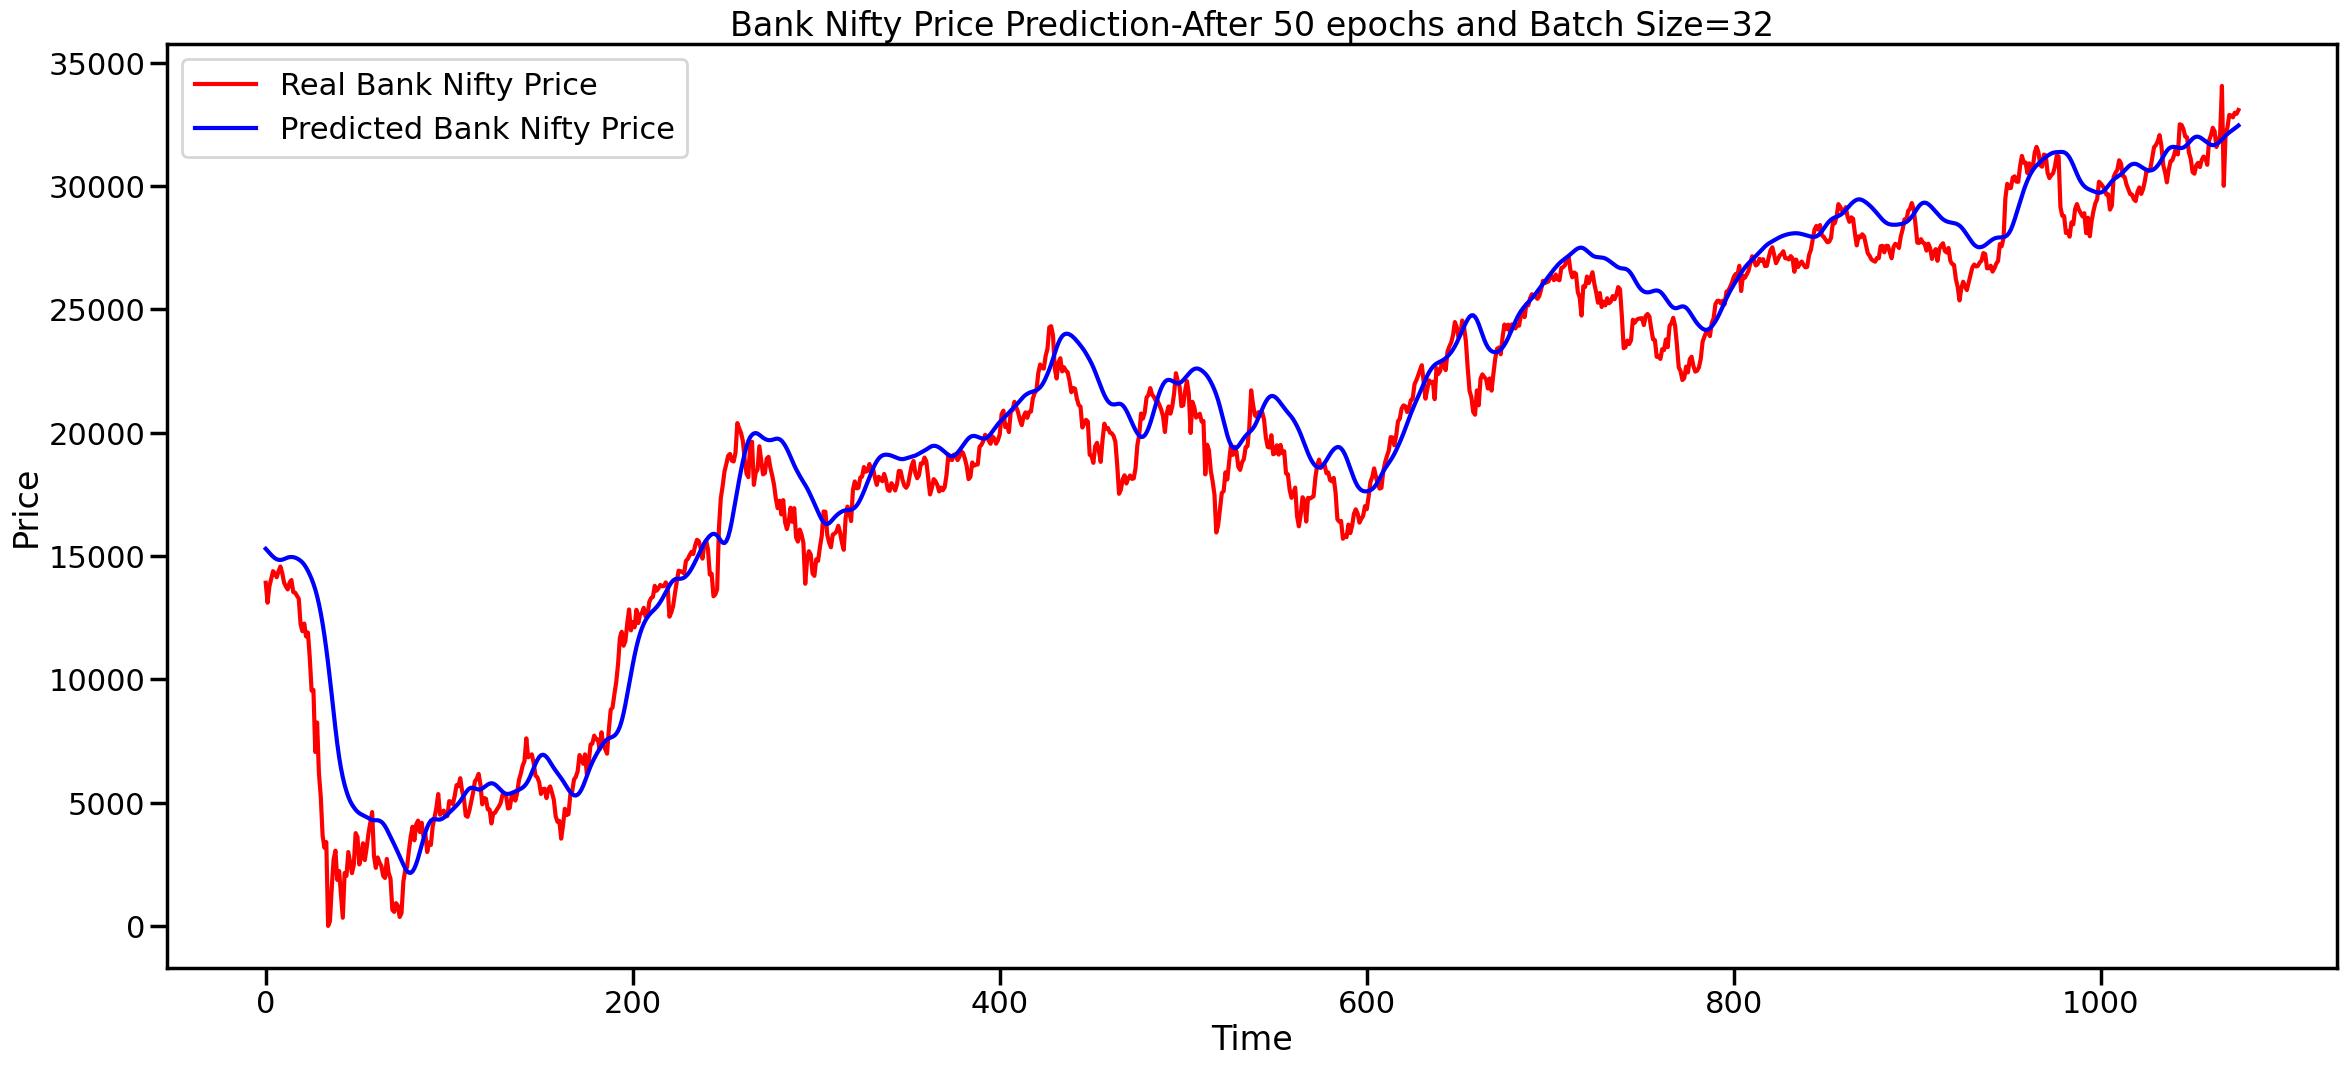

In [262]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [263]:
past_60 = data_training.tail(60)
print(past_60.shape)
# print(data_testing.shape)
dt = pd.concat([past_60, data_testing.tail(10)], ignore_index=True)
# print(dt.columns)
dt.shape

(60, 12)


(70, 12)

In [264]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
# inputs

(70, 12)


In [265]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((10, 60, 12), (10,))

In [266]:
y_pred = regressor.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.07320073],
       [0.08001998],
       [0.10694857],
       [0.1573419 ],
       [0.22842586],
       [0.31356484],
       [0.4047019 ],
       [0.49448717],
       [0.5776427 ],
       [0.65115666]], dtype=float32)

In [267]:
scale = 1/scalar.scale_[0]

y_pred = y_pred*scale
y_test = y_test*scale

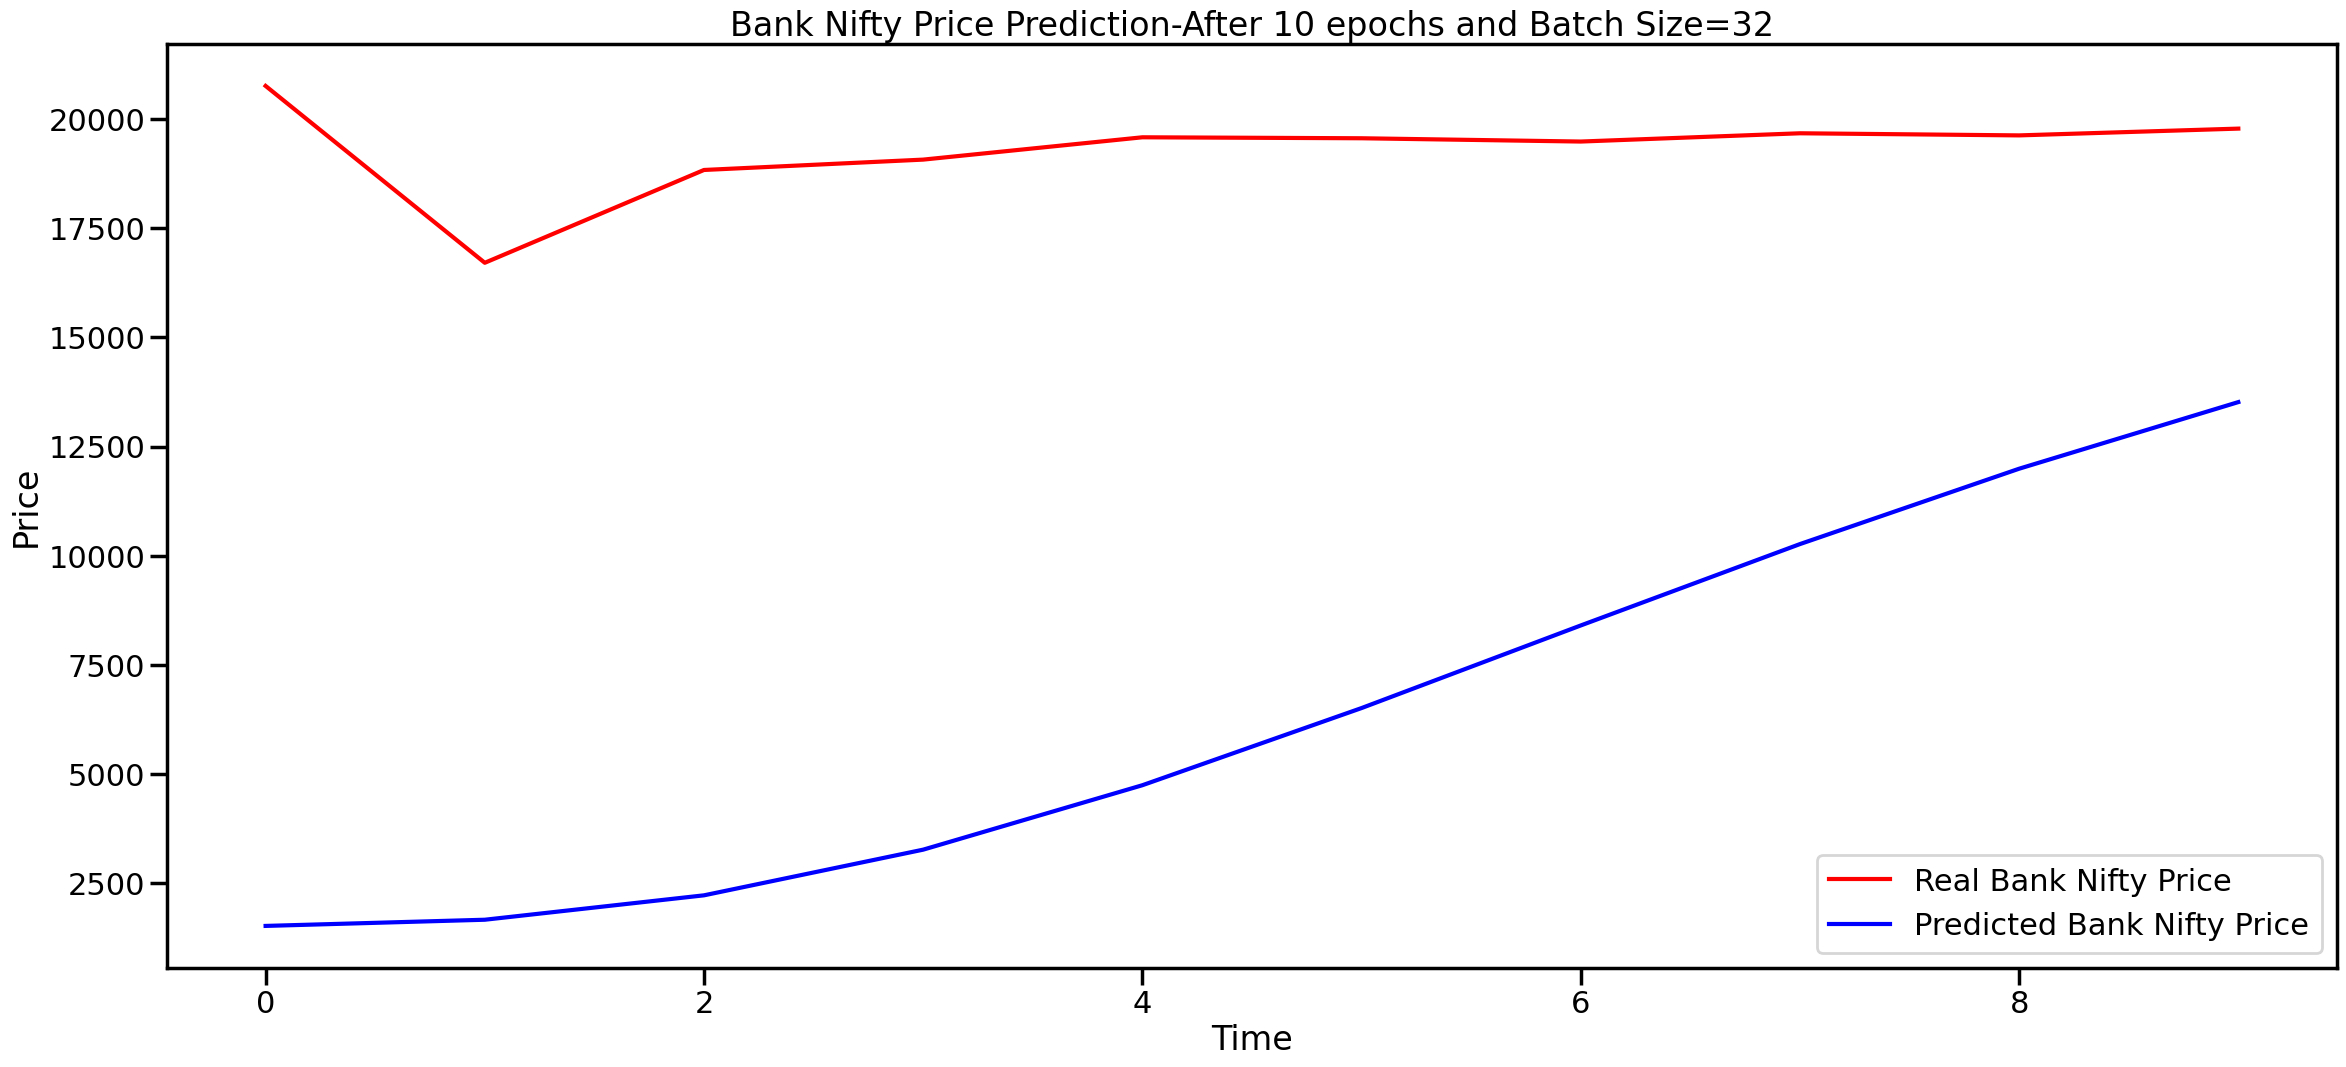

In [268]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

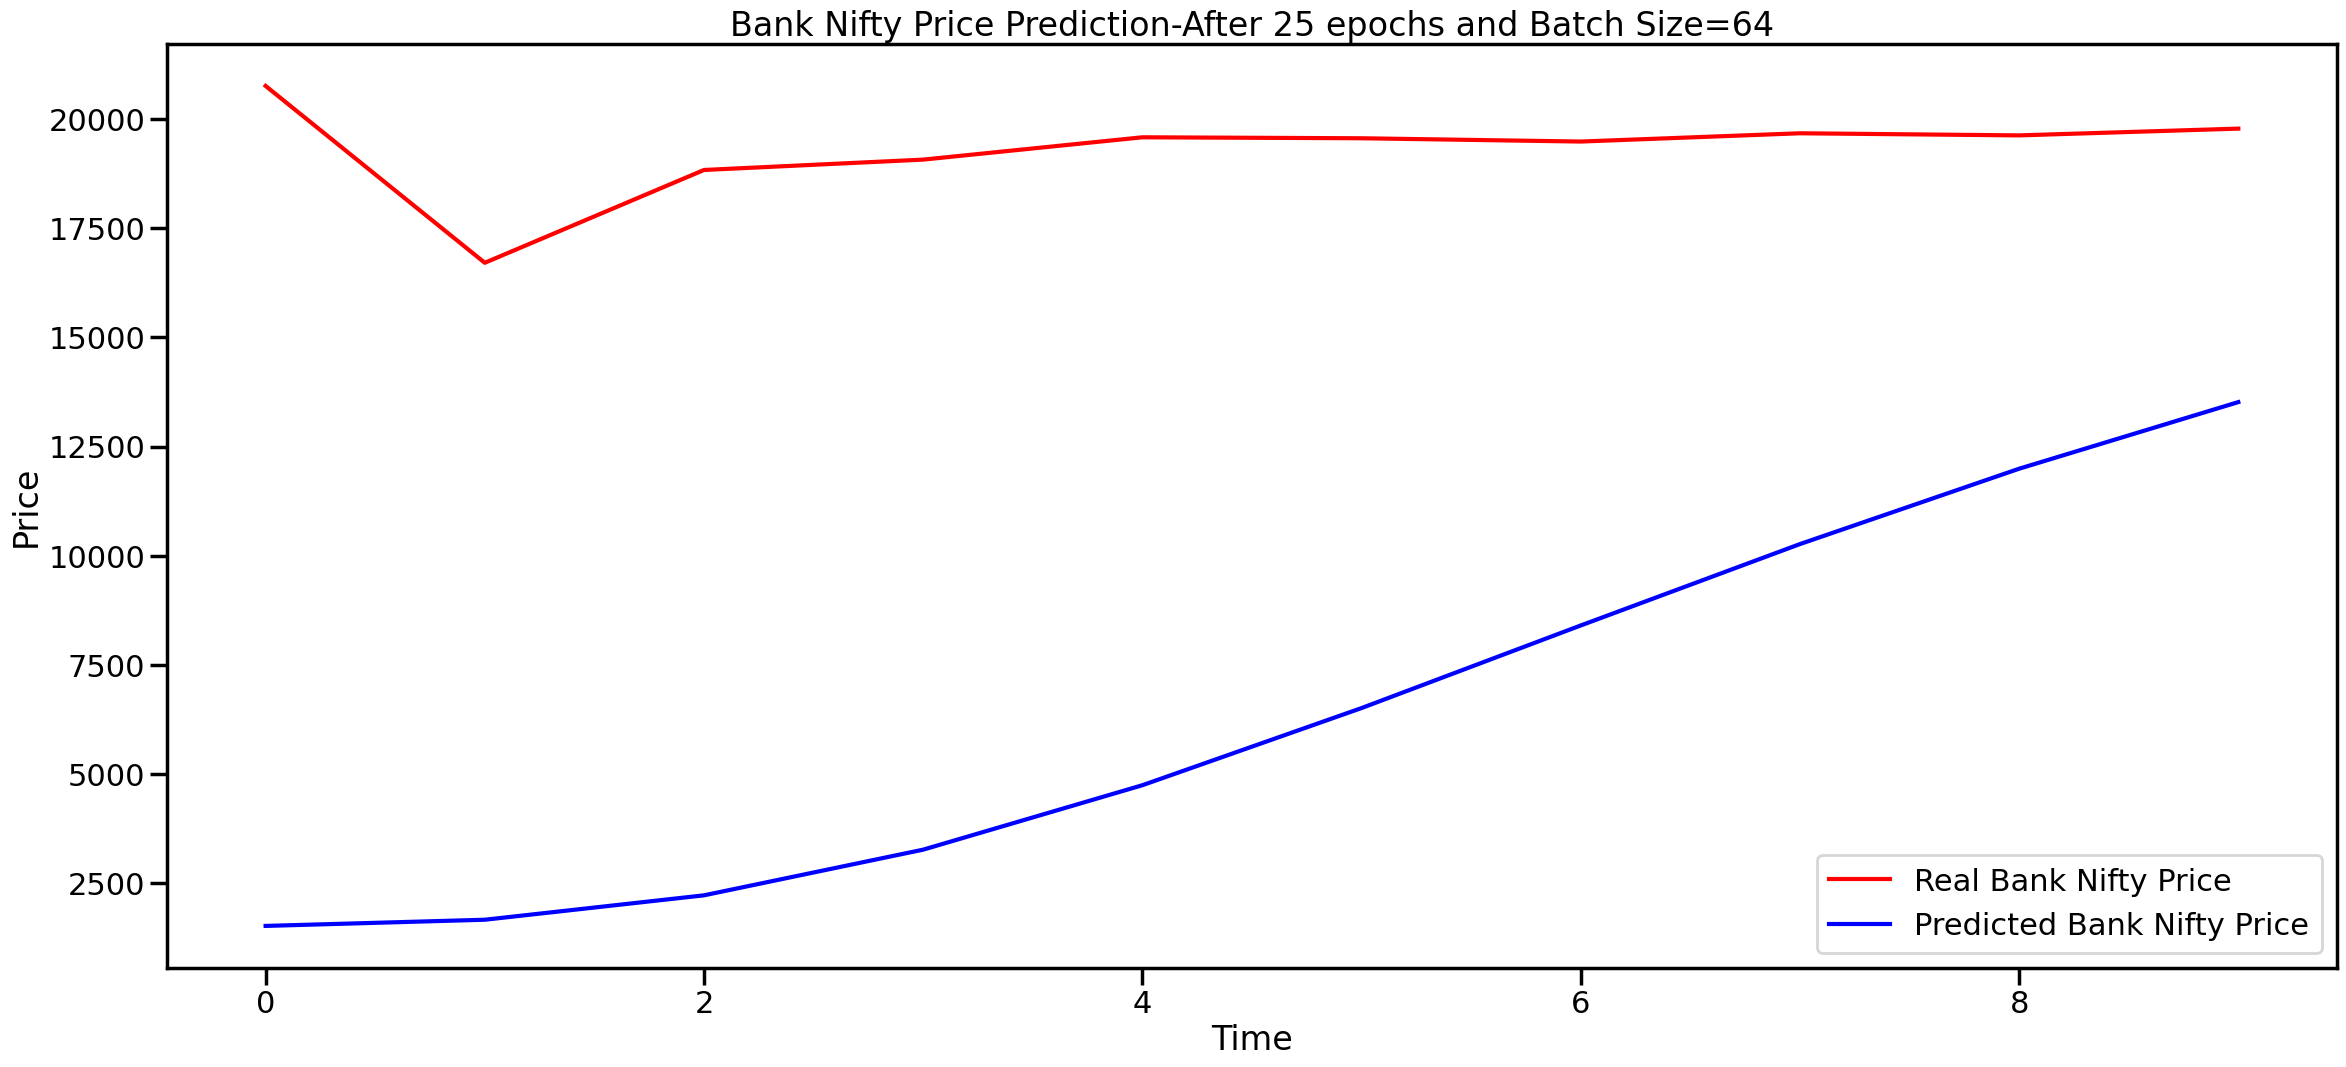

In [269]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

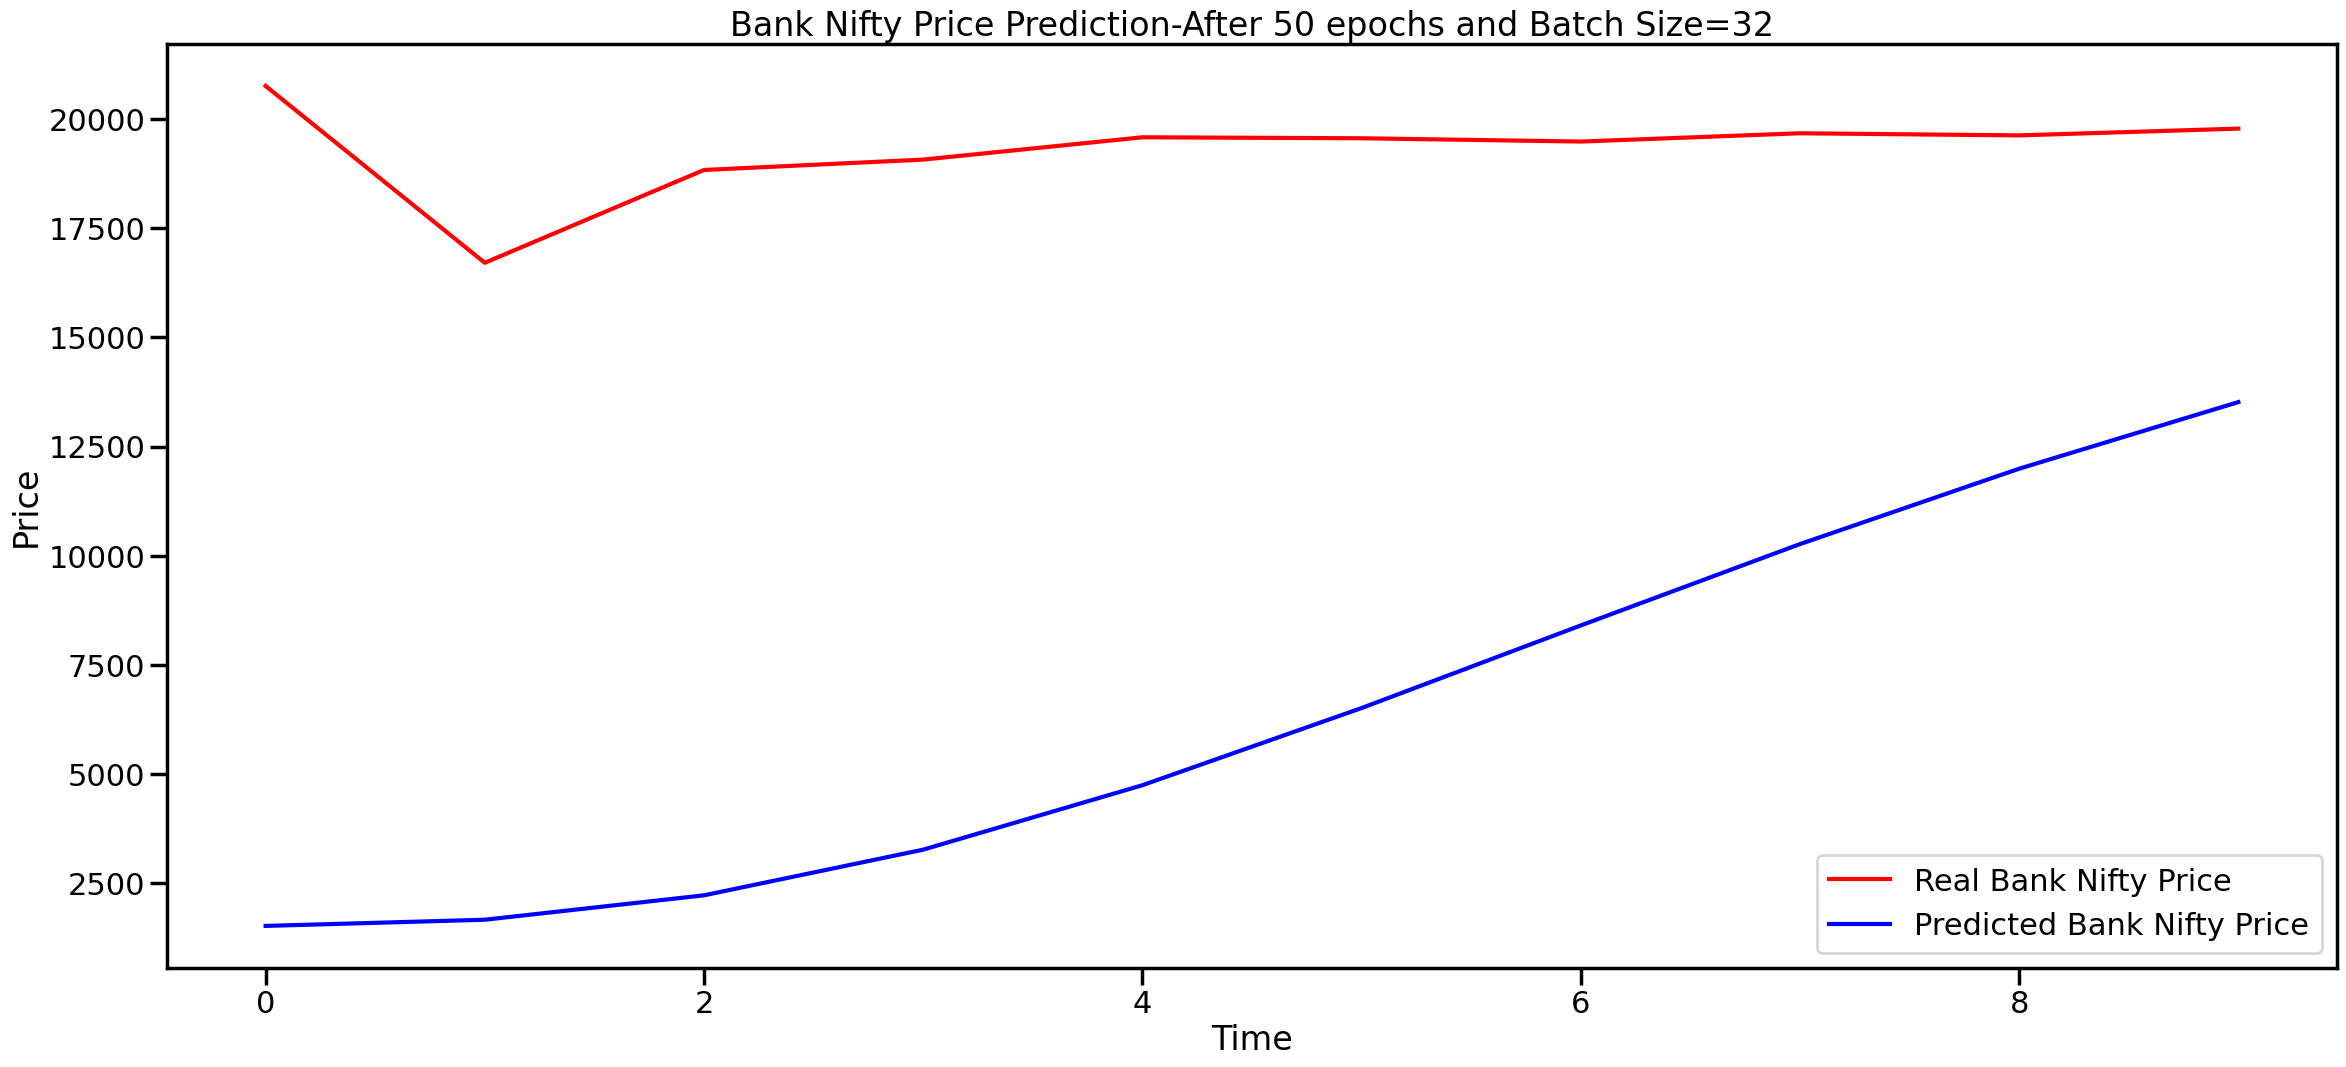

In [270]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()